___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
X_train[5].shape            # * grayscale

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

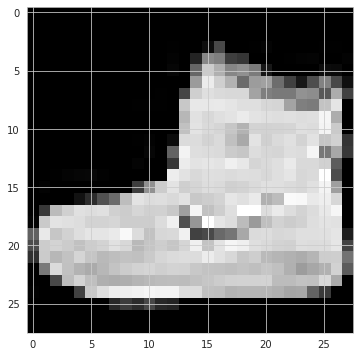

In [6]:
plt.imshow(X_train[0],cmap="gray")

In [7]:
np.unique(y_train, return_counts=True)               # 10 classdan 6000'er tane varmış

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [8]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [9]:
y_train[0]

9

In [10]:
classes[y_train[0]]

'Ankle boot'

[24841 50889 39103   196 15362  9638 48861 58327 36341]


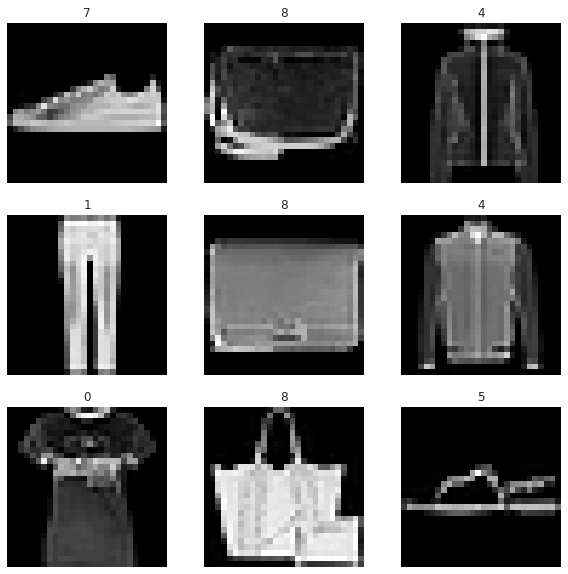

In [11]:
ix = np.random.choice(np.arange(X_train.shape[0]),9)
print(ix)
plt.figure(figsize = (10,10))
c = 1
for i in ix:
  ax = plt.subplot(3,3,c)
  plt.imshow(X_train[i],"gray")
  plt.title(y_train[i])
  c += 1
  plt.axis("off")

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [12]:
X_train[5].min()

0

In [13]:
X_train[5].max()  

255

In [14]:
X_test1 = X_test.copy()

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [16]:
X_train[5].max()

1.0

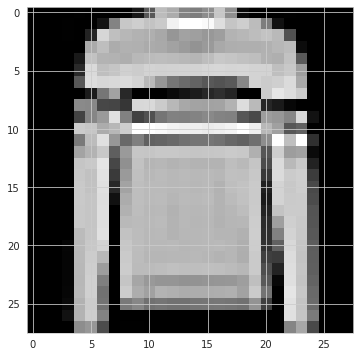

In [17]:
plt.imshow(X_train[5],cmap="gray")

In [18]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [20]:
X_train.reshape(60000, 28, 28, 1).shape  

(60000, 28, 28, 1)

In [21]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [23]:
## SPARSE MATRIX OLDUĞUNDAN ONU KULLANACAĞIM.

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [25]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid  BUNLAR DEFAULT STRİDE PADDİNG
                                                  # yükseklik , genişlik ,derinkik
                                                 # satır     , sütun    , kanal sayısı (rgb,wb or gray)

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size İLE AYNI OLUR DEFAULT OLARAK, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))        

model.add(Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

##  Model  1

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [29]:
model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test,y_test),callbacks=[early_stop]) 


Epoch 1/15
1875/1875 [==============================] - 9s 3ms/step - loss: 0.3838 - accuracy: 0.8624 - val_loss: 0.3094 - val_accuracy: 0.8912
Epoch 2/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2644 - accuracy: 0.9047 - val_loss: 0.2746 - val_accuracy: 0.8998
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2267 - accuracy: 0.9179 - val_loss: 0.2624 - val_accuracy: 0.9064
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2031 - accuracy: 0.9271 - val_loss: 0.2591 - val_accuracy: 0.9093
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1860 - accuracy: 0.9338 - val_loss: 0.2542 - val_accuracy: 0.9112
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1707 - accuracy: 0.9384 - val_loss: 0.2635 - val_accuracy: 0.9124
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1603 - accuracy: 0.9430 - val_loss: 0.2759 - val_accuracy:

In [30]:
model.metrics_names

['loss', 'accuracy']

In [31]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.384,0.862,0.309,0.891
1,0.264,0.905,0.275,0.900
2,0.227,0.918,0.262,0.906
3,0.203,0.927,0.259,0.909
4,0.186,0.934,0.254,0.911


**TASK 7: Plot values of metrics you used in your model.**

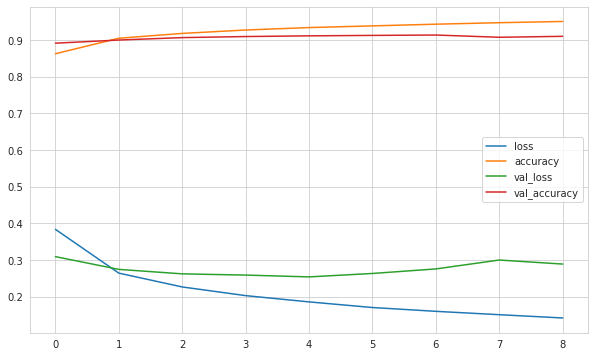

In [32]:
summary.plot();

In [33]:
##  patience=2, restore_best_weights = True'dan dolayı 7.epoch sonucundaki değerleri de küçük de olsa bir overfittinglikten bahsedebiliriz o yüzden yeniden bir model kuracağım.

## MODEL -2

In [34]:
from tensorflow.keras.layers import BatchNormalization

In [35]:
model2 = Sequential()

model2.add(Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
model2.add(BatchNormalization())

model2.add(Conv2D(28, (3,3), padding='same', activation='relu'))
model2.add(BatchNormalization())

model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(28, (3,3), padding='same', activation='relu'))
model2.add(BatchNormalization())

model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))        
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(32, activation='relu')) 
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(10, activation='softmax'))



model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               optimizer='adam',
              metrics=['accuracy'])

In [36]:
early_stop = EarlyStopping(monitor='val_loss',mode="min", patience=2, restore_best_weights = True)

In [37]:
model2.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test,y_test),callbacks=[early_stop]) 

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.7049 - accuracy: 0.7675 - val_loss: 0.4023 - val_accuracy: 0.8599
Epoch 2/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4451 - accuracy: 0.8550 - val_loss: 0.3521 - val_accuracy: 0.8753
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3884 - accuracy: 0.8742 - val_loss: 0.3322 - val_accuracy: 0.8800
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3536 - accuracy: 0.8846 - val_loss: 0.2758 - val_accuracy: 0.9071
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3240 - accuracy: 0.8952 - val_loss: 0.2610 - val_accuracy: 0.9061
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3087 - accuracy: 0.8981 - val_loss: 0.2621 - val_accuracy: 0.9055
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2919 - accuracy: 0.9071 - val_loss: 0.2476 - val_accu

In [38]:
model2.metrics_names

['loss', 'accuracy']

In [39]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.705,0.767,0.402,0.860
1,0.445,0.855,0.352,0.875
2,0.388,0.874,0.332,0.880
3,0.354,0.885,0.276,0.907
4,0.324,0.895,0.261,0.906


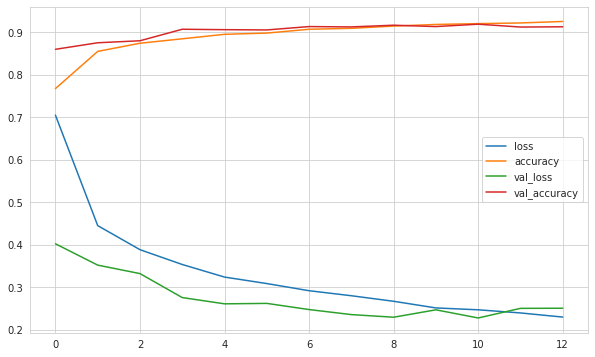

In [40]:
summary.plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [42]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [45]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2278 - accuracy: 0.9190


[0.22776442766189575, 0.9190000295639038]

In [48]:
score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22776442766189575
Test accuracy: 0.9190000295639038


## Prediction

In [49]:
pred_prob = model2.predict(X_test)
pred_prob

array([[3.1416645e-09, 2.5925171e-09, 7.7394247e-10, ..., 2.0592755e-05,
        2.2567226e-09, 9.9997616e-01],
       [7.6926878e-04, 1.8668572e-07, 9.9553537e-01, ..., 2.1674063e-07,
        7.6957980e-07, 2.6772613e-08],
       [4.4730911e-07, 9.9999440e-01, 6.5885695e-07, ..., 3.8368437e-08,
        1.0093267e-07, 4.1984649e-08],
       ...,
       [3.0354233e-06, 3.7309448e-07, 1.2904609e-06, ..., 1.4644978e-07,
        9.9998617e-01, 2.5230420e-07],
       [1.6161314e-08, 9.9999976e-01, 2.0727487e-08, ..., 9.0860164e-09,
        4.7913651e-09, 9.2230295e-09],
       [2.1314459e-06, 2.2453976e-06, 1.5488296e-05, ..., 4.0951096e-03,
        2.1500344e-04, 4.0916115e-04]], dtype=float32)

In [50]:
pred_prob[0]

array([3.1416645e-09, 2.5925171e-09, 7.7394247e-10, 1.1025223e-10,
       3.9824100e-10, 3.1941393e-06, 1.9893560e-09, 2.0592755e-05,
       2.2567226e-09, 9.9997616e-01], dtype=float32)

In [51]:
np.argmax(pred_prob[0])

9

In [52]:
y_pred = np.argmax(pred_prob, axis=1)

In [53]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1000
           1       0.99      0.98      0.99      1000
           2       0.91      0.86      0.89      1000
           3       0.92      0.93      0.92      1000
           4       0.84      0.90      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.77      0.72      0.75      1000
           7       0.97      0.95      0.96      1000
           8       0.99      0.99      0.99      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [55]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

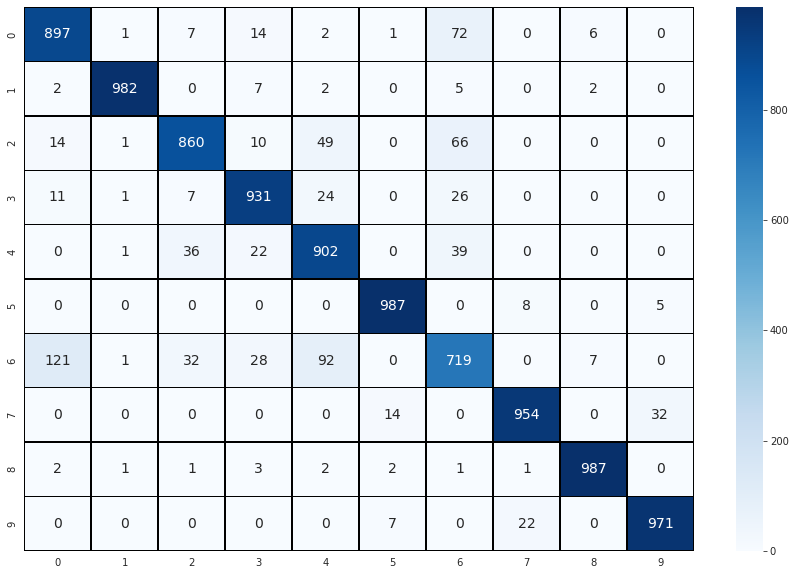

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [57]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [58]:
(y_test != y_pred).sum()

810

Shirt
Dress


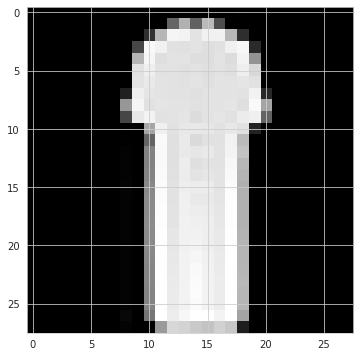

In [61]:
ix = y_test != y_pred



print(classes[y_test[ix][13]])
print(classes[y_pred[ix][13]])

plt.imshow(X_test1[ix][13],"gray")

In [62]:
pred_prob[ix][13]

array([4.7338754e-03, 1.8375534e-04, 1.4778231e-03, 9.6982366e-01,
       7.9693543e-03, 3.2668549e-06, 1.5781926e-02, 1.1762170e-06,
       2.4276869e-05, 8.6595401e-07], dtype=float32)

<BarContainer object of 10 artists>

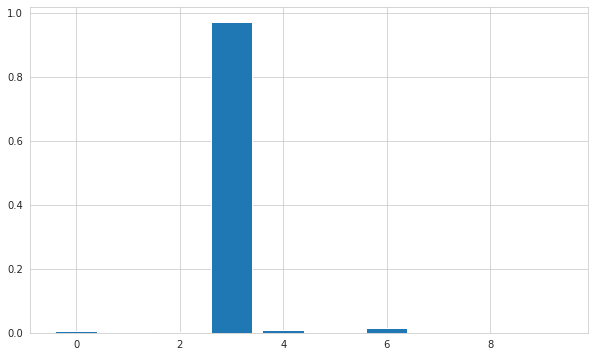

In [127]:
plt.bar(range(10),pred_prob[ix][13])

In [128]:
model2.save("cnn-2.h5")

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___